## 공공데이터 활용 지원센터_ 보건복지부 코로나 19 시, 도 발생 현황
- 검색어: 보건복지부 코로나 19
- 데이터셋: https://data.go.kr/iim/api/selectAPIAcountView.do
        
    문제 정의
- 지역별 확진자 수가 가장 많은 지역은?
- 확진자 수 발생률이 가장 높은 지역은?
- 사망자 수가 가장 많은 지역은?
- 해외 유입으로 인한 확진자 수가 가장 많은 지역은?

## 데이터 수집

### Request - Response

In [10]:
import requests
import pandas as pd
import xmltodict
import json

url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson'

params = {
    'serviceKey' : '2d/kqDK/CUnoxGW/RnHFEpXgrBjB5Pw4MmMqhYKoIvdApLpkThFwjtvksZFh2VcCF8HsGQ0J8G1t7RDcLVaoLg=='
    ,'startCreateDt' : '20210101'
    , 'endCreateDt' : '20210616'
    , 'numOfRows' : 50000
    , 'pageNo' : 1
}

res = requests.get(url, params = params)
# print(res.status_code)
# print(res.text)

dict_type = xmltodict.parse(res.text)
json_object = json.loads(json.dumps(dict_type))
print(json_object)

{'response': {'header': {'resultCode': '00', 'resultMsg': 'NORMAL SERVICE.'}, 'body': {'items': {'item': [{'createDt': '2021-06-16 09:55:56.579', 'deathCnt': '5', 'defCnt': '3972', 'gubun': '검역', 'gubunCn': '隔離區', 'gubunEn': 'Lazaretto', 'incDec': '8', 'isolClearCnt': '3800', 'isolIngCnt': '167', 'localOccCnt': '0', 'overFlowCnt': '8', 'qurRate': '-', 'seq': '10172', 'stdDay': '2021년 06월 16일 00시', 'updateDt': 'null'}, {'createDt': '2021-06-16 09:55:56.579', 'deathCnt': '1', 'defCnt': '1207', 'gubun': '제주', 'gubunCn': '济州', 'gubunEn': 'Jeju', 'incDec': '9', 'isolClearCnt': '1105', 'isolIngCnt': '101', 'localOccCnt': '9', 'overFlowCnt': '0', 'qurRate': '179.95', 'seq': '10171', 'stdDay': '2021년 06월 16일 00시', 'updateDt': 'null'}, {'createDt': '2021-06-16 09:55:56.579', 'deathCnt': '20', 'defCnt': '5056', 'gubun': '경남', 'gubunCn': '庆南', 'gubunEn': 'Gyeongsangnam-do', 'incDec': '7', 'isolClearCnt': '4786', 'isolIngCnt': '250', 'localOccCnt': '7', 'overFlowCnt': '0', 'qurRate': '150.42', 'se

## EDA 탐색적 분석

### DataFrame 생성

In [11]:
data = json_object['response']['body']['items']['item']

df = pd.DataFrame(data)
df

,createDt,deathCnt,defCnt,gubun,gubunCn,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,seq,stdDay,updateDt
0,2021-06-16 09:55:56.579,5,3972,검역,隔離區,Lazaretto,8,3800,167,0,8,-,10172,2021년 06월 16일 00시,null
1,2021-06-16 09:55:56.579,1,1207,제주,济州,Jeju,9,1105,101,9,0,179.95,10171,2021년 06월 16일 00시,null
2,2021-06-16 09:55:56.579,20,5056,경남,庆南,Gyeongsangnam-do,7,4786,250,7,0,150.42,10170,2021년 06월 16일 00시,null
3,2021-06-16 09:55:56.579,86,4825,경북,庆北,Gyeongsangbuk-do,3,4629,110,3,0,181.22,10169,2021년 06월 16일 00시,null
4,2021-06-16 09:55:56.578,15,1564,전남,全南,Jeollanam-do,8,1453,96,8,0,83.87,10168,2021년 06월 16일 00시,null
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3168,2021-01-01 9:41:33.33,29,2904,인천,仁川,Incheon,65,2150,725,63,2,35.93,6757,2021년 01월 01일 00시,NULL
3169,2021-01-01 9:41:33.33,201,7844,대구,大邱,Daegu,43,7294,349,43,0,294.85,6756,2021년 01월 01일 00시,NULL
3170,2021-01-01 9:41:33.33,50,1925,부산,釜山,Busan,57,1370,505,55,2,17.59,6755,2021년 01월 01일 00시,NULL
3171,2021-01-01 9:41:33.33,182,19362,서울,首尔,Seoul,358,10787,8393,357,1,64.44,6754,2021년 01월 01일 00시,2021-01-03 10:39:19.19


### 요약 정보 확인

In [12]:
df.head() # 요약정보 확인

,createDt,deathCnt,defCnt,gubun,gubunCn,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,seq,stdDay,updateDt
0,2021-06-16 09:55:56.579,5,3972,검역,隔離區,Lazaretto,8,3800,167,0,8,-,10172,2021년 06월 16일 00시,null
1,2021-06-16 09:55:56.579,1,1207,제주,济州,Jeju,9,1105,101,9,0,179.95,10171,2021년 06월 16일 00시,null
2,2021-06-16 09:55:56.579,20,5056,경남,庆南,Gyeongsangnam-do,7,4786,250,7,0,150.42,10170,2021년 06월 16일 00시,null
3,2021-06-16 09:55:56.579,86,4825,경북,庆北,Gyeongsangbuk-do,3,4629,110,3,0,181.22,10169,2021년 06월 16일 00시,null
4,2021-06-16 09:55:56.578,15,1564,전남,全南,Jeollanam-do,8,1453,96,8,0,83.87,10168,2021년 06월 16일 00시,null


In [33]:
df.tail()

,기준일시,사망자 수,확진자 수,시도명(한글),해외유입 수,10만명당 발생률
3167,<bound method NDFrame.copy of 0 2021-06-1...,6,1098,광주,1,35.42
3168,<bound method NDFrame.copy of 0 2021-06-1...,29,2904,인천,2,35.93
3169,<bound method NDFrame.copy of 0 2021-06-1...,201,7844,대구,0,294.85
3170,<bound method NDFrame.copy of 0 2021-06-1...,50,1925,부산,2,17.59
3171,<bound method NDFrame.copy of 0 2021-06-1...,182,19362,서울,1,64.44


In [13]:
df.info() #<class 'pandas.core.frame.DataFrame'>
# RangeIndex: 3173 entries, 0 to 3172 Data columns (total 15 columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3173 entries, 0 to 3172
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   createDt      3173 non-null   object
 1   deathCnt      3173 non-null   object
 2   defCnt        3173 non-null   object
 3   gubun         3173 non-null   object
 4   gubunCn       3173 non-null   object
 5   gubunEn       3173 non-null   object
 6   incDec        3173 non-null   object
 7   isolClearCnt  3173 non-null   object
 8   isolIngCnt    3173 non-null   object
 9   localOccCnt   3173 non-null   object
 10  overFlowCnt   3173 non-null   object
 11  qurRate       3173 non-null   object
 12  seq           3173 non-null   object
 13  stdDay        3173 non-null   object
 14  updateDt      3173 non-null   object
dtypes: object(15)
memory usage: 372.0+ KB


In [14]:
df.describe()

,createDt,deathCnt,defCnt,gubun,gubunCn,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,seq,stdDay,updateDt
count,3173,3173,3173,3173,3173,3173,3173,3173,3173,3173,3173,3173,3173,3173,3173
unique,505,536,2589,19,19,19,355,2479,1032,353,46,2611,3173,275,188
top,2021-01-16 9:49:52.52,1,250,경기,光州,Chungcheongnam-do,1,2224,23,0,0,-,9735,2021년 01월 16일 00시,null
freq,19,293,9,167,167,167,159,8,23,326,1744,166,1,19,1811


### 엑셀 파일로 변환

In [50]:
df.to_excel('corona19.xlsx')

PermissionError: [Errno 13] Permission denied: 'corona19.xlsx'

### 칼럼 의미 확인

In [16]:
col_codes = 'createDt	deathCnt	defCnt	gubun	gubunCn	gubunEn	incDec	isolClearCnt	isolIngCnt	localOccCnt	overFlowCnt	qurRate	seq	stdDay	updateDt'.split('\t')
print(col_codes)
print()

col_names = '등록일시분초	사망자 수	확진자 수	시도명(한글)	시도명(중국어)	시도명(영어)	전일대비 증감 수	격리 해제 수	격리중 환자수	지역발생 수	해외유입 수	10만명당 발생률	게시글번호	기준일시	수정일시분초'.split('\t')
print(col_names)

columns = dict(zip(col_codes, col_names))
print(columns)

['createDt', 'deathCnt', 'defCnt', 'gubun', 'gubunCn', 'gubunEn', 'incDec', 'isolClearCnt', 'isolIngCnt', 'localOccCnt', 'overFlowCnt', 'qurRate', 'seq', 'stdDay', 'updateDt']

['등록일시분초', '사망자 수', '확진자 수', '시도명(한글)', '시도명(중국어)', '시도명(영어)', '전일대비 증감 수', '격리 해제 수', '격리중 환자수', '지역발생 수', '해외유입 수', '10만명당 발생률', '게시글번호', '기준일시', '수정일시분초']
{'createDt': '등록일시분초', 'deathCnt': '사망자 수', 'defCnt': '확진자 수', 'gubun': '시도명(한글)', 'gubunCn': '시도명(중국어)', 'gubunEn': '시도명(영어)', 'incDec': '전일대비 증감 수', 'isolClearCnt': '격리 해제 수', 'isolIngCnt': '격리중 환자수', 'localOccCnt': '지역발생 수', 'overFlowCnt': '해외유입 수', 'qurRate': '10만명당 발생률', 'seq': '게시글번호', 'stdDay': '기준일시', 'updateDt': '수정일시분초'}


## 데이터 전처리(가공)
- 칼럼 변경

In [17]:
df.columns = col_names
df.head(1)

,등록일시분초,사망자 수,확진자 수,시도명(한글),시도명(중국어),시도명(영어),전일대비 증감 수,격리 해제 수,격리중 환자수,지역발생 수,해외유입 수,10만명당 발생률,게시글번호,기준일시,수정일시분초
0,2021-06-16 09:55:56.579,5,3972,검역,隔離區,Lazaretto,8,3800,167,0,8,-,10172,2021년 06월 16일 00시,null


In [19]:
# 칼럼 추려내기 
df = df[['기준일시','사망자 수', '확진자 수','시도명(한글)','해외유입 수','10만명당 발생률']]
df 

,기준일시,사망자 수,확진자 수,시도명(한글),해외유입 수,10만명당 발생률
0,2021년 06월 16일 00시,5,3972,검역,8,-
1,2021년 06월 16일 00시,1,1207,제주,0,179.95
2,2021년 06월 16일 00시,20,5056,경남,0,150.42
3,2021년 06월 16일 00시,86,4825,경북,0,181.22
4,2021년 06월 16일 00시,15,1564,전남,0,83.87
...,...,...,...,...,...,...
3168,2021년 01월 01일 00시,29,2904,인천,2,35.93
3169,2021년 01월 01일 00시,201,7844,대구,0,294.85
3170,2021년 01월 01일 00시,50,1925,부산,2,17.59
3171,2021년 01월 01일 00시,182,19362,서울,1,64.44


In [20]:
cond = df['시도명(한글)'] == '합계'
df = df[~cond] # ~: not의 의미
df # 필요 로우 추출

,기준일시,사망자 수,확진자 수,시도명(한글),해외유입 수,10만명당 발생률
0,2021년 06월 16일 00시,5,3972,검역,8,-
1,2021년 06월 16일 00시,1,1207,제주,0,179.95
2,2021년 06월 16일 00시,20,5056,경남,0,150.42
3,2021년 06월 16일 00시,86,4825,경북,0,181.22
4,2021년 06월 16일 00시,15,1564,전남,0,83.87
...,...,...,...,...,...,...
3167,2021년 01월 01일 00시,6,1098,광주,1,35.42
3168,2021년 01월 01일 00시,29,2904,인천,2,35.93
3169,2021년 01월 01일 00시,201,7844,대구,0,294.85
3170,2021년 01월 01일 00시,50,1925,부산,2,17.59


In [23]:
df['10만명당 발생률'] = df['10만명당 발생률'].replace('-',0).copy()
df

,기준일시,사망자 수,확진자 수,시도명(한글),해외유입 수,10만명당 발생률
0,2021년 06월 16일 00시,5,3972,검역,8,0
1,2021년 06월 16일 00시,1,1207,제주,0,179.95
2,2021년 06월 16일 00시,20,5056,경남,0,150.42
3,2021년 06월 16일 00시,86,4825,경북,0,181.22
4,2021년 06월 16일 00시,15,1564,전남,0,83.87
...,...,...,...,...,...,...
3167,2021년 01월 01일 00시,6,1098,광주,1,35.42
3168,2021년 01월 01일 00시,29,2904,인천,2,35.93
3169,2021년 01월 01일 00시,201,7844,대구,0,294.85
3170,2021년 01월 01일 00시,50,1925,부산,2,17.59


In [25]:
df = df.astype({
    '사망자 수' : int,
    '확진자 수' : int,
    '해외유입 수' : int,
    '10만명당 발생률' : float # could not convert string to float: '-'
})

df.info

<bound method DataFrame.info of                    기준일시  사망자 수  확진자 수 시도명(한글)  해외유입 수  10만명당 발생률
0     2021년 06월 16일 00시      5   3972      검역       8       0.00
1     2021년 06월 16일 00시      1   1207      제주       0     179.95
2     2021년 06월 16일 00시     20   5056      경남       0     150.42
3     2021년 06월 16일 00시     86   4825      경북       0     181.22
4     2021년 06월 16일 00시     15   1564      전남       0      83.87
...                 ...    ...    ...     ...     ...        ...
3167  2021년 01월 01일 00시      6   1098      광주       1      35.42
3168  2021년 01월 01일 00시     29   2904      인천       2      35.93
3169  2021년 01월 01일 00시    201   7844      대구       0     294.85
3170  2021년 01월 01일 00시     50   1925      부산       2      17.59
3171  2021년 01월 01일 00시    182  19362      서울       1      64.44

[3006 rows x 6 columns]>

In [30]:
df['기준일시'] = pd.to_datetime(df['기준일시'], format='%Y년 %m월 %d일 %H시').copy
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3006 entries, 0 to 3171
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   기준일시       3006 non-null   object 
 1   사망자 수      3006 non-null   int32  
 2   확진자 수      3006 non-null   int32  
 3   시도명(한글)    3006 non-null   object 
 4   해외유입 수     3006 non-null   int32  
 5   10만명당 발생률  3006 non-null   float64
dtypes: float64(1), int32(3), object(2)
memory usage: 129.2+ KB


In [29]:
df.describe()

,사망자 수,확진자 수,해외유입 수,10만명당 발생률
count,3006.000000,3006.000000,3006.000000,3006.000000
mean,91.772122,5763.730872,1.343646,135.592013
std,142.901042,9279.754602,2.828193,96.701911
min,0.000000,150.000000,0.000000,0.000000
25%,13.000000,1303.000000,0.000000,74.315000
50%,37.000000,2516.500000,0.000000,117.150000
75%,72.000000,4343.750000,1.000000,169.385000
max,648.000000,46932.000000,31.000000,482.170000


In [35]:
#칼럼 순서 바꾸기
df = df[['시도명(한글)','사망자 수', '확진자 수','해외유입 수','10만명당 발생률']]
df

,시도명(한글),사망자 수,확진자 수,해외유입 수,10만명당 발생률
0,검역,5,3972,8,0.00
1,제주,1,1207,0,179.95
2,경남,20,5056,0,150.42
3,경북,86,4825,0,181.22
4,전남,15,1564,0,83.87
...,...,...,...,...,...
3167,광주,6,1098,1,35.42
3168,인천,29,2904,2,35.93
3169,대구,201,7844,0,294.85
3170,부산,50,1925,2,17.59


## 데이터 분석 및 시각화
- 지역별 확진자 수가 가장 많은 지역은?

In [38]:
df_시도별 = df.groupby('시도명(한글)').sum().sort_values(by='확진자 수', ascending = False)
df_시도별

,사망자 수,확진자 수,해외유입 수,10만명당 발생률
시도명(한글),,,,
서울,66139,5406230,540,53340.93
경기,86475,4694209,846,34096.33
대구,35887,1495415,98,60808.92
인천,8974,817709,158,26547.96
부산,18117,659531,140,18581.69
경북,12352,604949,135,22125.09
검역,601,530387,1532,0.00
경남,2306,505832,97,14483.72
충남,5756,444178,119,20121.99


서울     5406230
경기     4694209
대구     1495415
인천      817709
부산      659531
Etc    4252681
dtype: int64


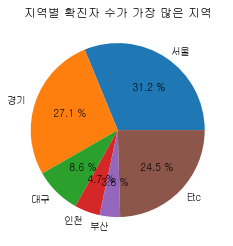

In [49]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
top5 = df_시도별['확진자 수'][:5]
etc = pd.Series({
    'Etc' : df_시도별['확진자 수'][5:].sum()
})

# print(top5)
total = pd.concat([top5, etc])
print(total)

plt.title('지역별 확진자 수가 가장 많은 지역')
plt.pie(total, labels = total.index , autopct= '% 1.1f %%')
plt.show()

## 확진자 수 발생률이 가장 높은 지역은?

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

